In [1]:
from importlib import reload
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve

In [2]:
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
%cd ../

/home/pedro/hackathon/antibody-pairing


In [4]:
X = pd.read_csv('train_data/train.csv.zip')
print(f'Dataset is {sys.getsizeof(X)/10**9} GB.')

Dataset is 10.689168144 GB.


In [5]:
Y = np.zeros(X.shape[0])
Y[:Y.size//2] = 1

In [21]:
targets = pd.Series(Y)
targets.name = 'target'
targets.to_csv('train_data/targets.csv', index=False)
targets

In [6]:
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, test_size=.1,
                                      random_state=42)

In [46]:
#classifier = make_pipeline(StandardScaler(), MLPClassifier(verbose=True))
classifier = RandomForestClassifier(n_estimators=100, max_depth=30, verbose=2, n_jobs=-1, random_state=42)
classifier.fit(Xtr, Ytr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100
building tree 8 of 100
building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100building tree 24 of 100
building tree 25 of 100

building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  43 out of 100 | elapsed:   23.2s remaining:   30.8s
[Parallel(n_jobs=-1)]: Done  94 out of 100 | elapsed:   28.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.4s finished


RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42, verbose=2)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  43 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=80)]: Done  94 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.1s finished


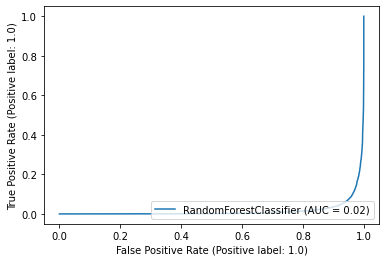

In [50]:
plot_roc_curve(classifier, Xts, Yts)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  43 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=80)]: Done  94 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.1s finished


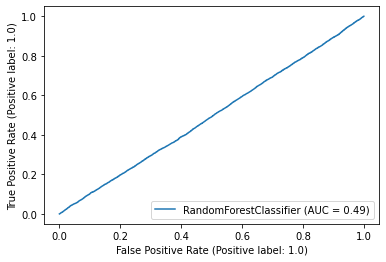

In [49]:
Ytsr = Yts.copy()
np.random.shuffle(Ytsr)
plot_roc_curve(classifier, Xts, Ytsr)

In [51]:
Yp = classifier.predict_proba(Xts)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  43 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=80)]: Done  94 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
guess = (1-Yp[:,0] + Yp[:,1]) / 2

In [60]:
Yts.reshape(5, -1), guess.round().reshape(5, -1)

(array([[1., 1., 1., ..., 1., 0., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 0., 1.],
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 1., 1.],
        [1., 1., 0., ..., 0., 0., 1.],
        [1., 0., 1., ..., 0., 1., 0.],
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 0., 0., ..., 1., 1., 1.]]))

### Save model

In [64]:
classifier = RandomForestClassifier(n_estimators=90, max_depth=30, verbose=2, n_jobs=-1, random_state=42)
classifier.fit(X, Y)

In [65]:
joblib.dump(classifier, 'models/RandomForest_100est_30depth.pkl')

['models/RandomForest_100est_30depth.pkl']

In [66]:
classifier = make_pipeline(StandardScaler(), MLPClassifier(verbose=True))
classifier.fit(Xtr, Ytr)

Iteration 1, loss = 0.80665327
Iteration 2, loss = 0.70102950
Iteration 3, loss = 0.69931056
Iteration 4, loss = 0.69826968
Iteration 5, loss = 0.69837270
Iteration 6, loss = 0.69732453
Iteration 7, loss = 0.69909883
Iteration 8, loss = 0.69805398


/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(verbose=True))])

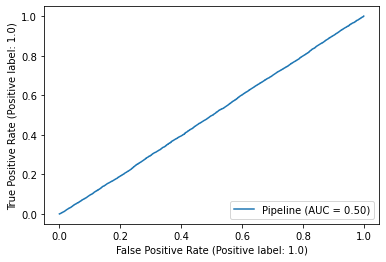

In [68]:
plot_roc_curve(classifier, Xts, Yts)

In [70]:
classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
classifier.fit(Xtr, Ytr)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
plot_roc_curve(classifier, Xts, Yts)

In [10]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(n_estimators=90, n_jobs=-1, max_depth=10, verbosity=3))
xgb.fit(Xtr, Ytr)

/usr/lib/python3.9/site-packages/xgboost/sklearn.py:1176: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:57:37] DEBUG: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[06:57:48] INFO: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 256 extra nodes, 0 pruned nodes, max_depth=10
[06:57:48] WARNING: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:57:51] INFO: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 538 extra nodes, 0 pruned nodes, max_depth=10
[06:57:54] INFO: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 350 extra nodes, 0 pruned nodes, max_depth=10
[06:57:58] INFO: /home/pedro/.cache/yay/xgboost-git/src/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 ex

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=10, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=90,
                               n_jobs=-1, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=3))])

/usr/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


['models/XGBoost_90est_10maxdepth.pkl']

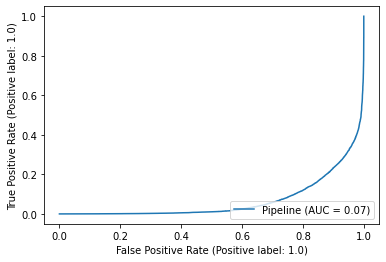

In [12]:
plot_roc_curve(xgb, Xts, Yts)
joblib.dump(xgb, 'models/XGBoost_90est_10maxdepth.pkl')